Лабораторна 6 Сеньків Маркіян ТР-31

Вимоги до завдання 1:

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Завантаження даних
columns = ["TimesPregnant", "PlasmaGlucose", "DiastolicBP", "TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree", "Age", "Class"]
df = pd.read_csv('pima-indians-diabetes.data.csv', names = columns)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(df, test_size=0.30, random_state=42)



print(f"{train_data}")
print(f"{test_data}")

     TimesPregnant  PlasmaGlucose  DiastolicBP  TricepsThickness  \
334              1             95           60                18   
139              5            105           72                29   
485              0            135           68                42   
547              4            131           68                21   
18               1            103           30                38   
..             ...            ...          ...               ...   
71               5            139           64                35   
106              1             96          122                 0   
270             10            101           86                37   
435              0            141            0                 0   
102              0            125           96                 0   

     SerumInsulin   BMI  DiabetesPedigree  Age  Class  
334            58  23.9             0.260   22      0  
139           325  36.9             0.159   28      0  
485           2

In [125]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.iloc[:, :-1])
test_scaled = scaler.transform(test_data.iloc[:, :-1])

# Отримані нормалізовані тренувальні та тестові вибірки
X_train = pd.DataFrame(train_scaled, columns=train_data.columns[:-1])
X_test = pd.DataFrame(test_scaled, columns=test_data.columns[:-1])
y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]

In [126]:
# Створення моделі логістичної регресії
model = LogisticRegression()

# Тренування моделі
model.fit(X_train, y_train)

# Оцінка моделі
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Точність моделі: {accuracy:.2f}")

Точність моделі: 0.74


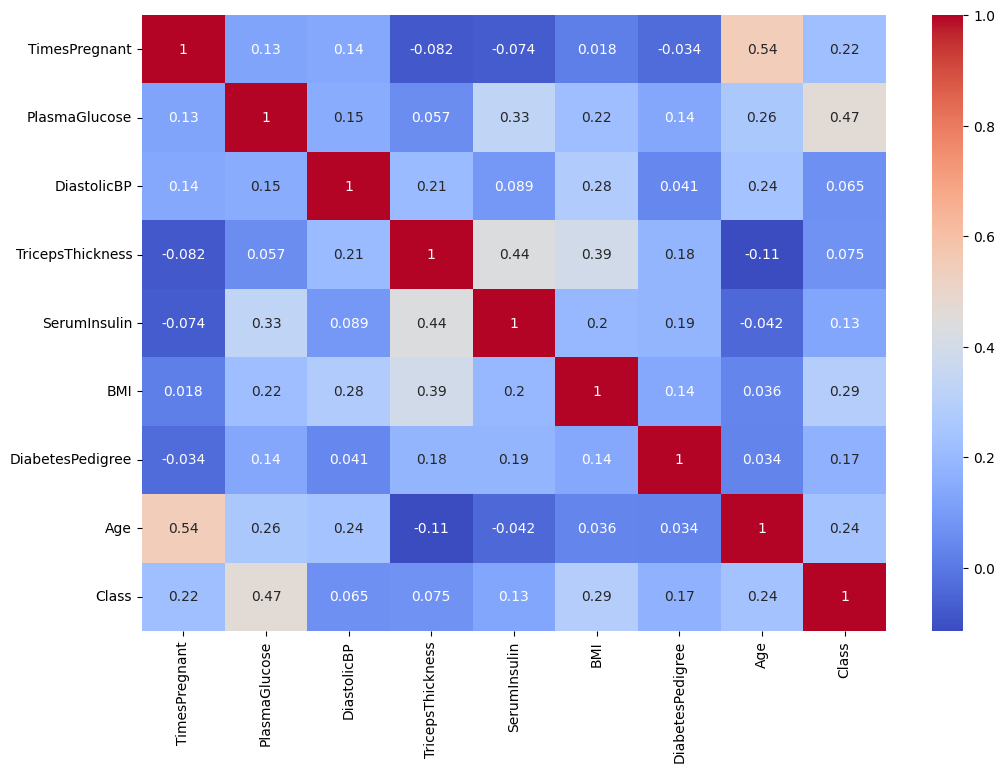

In [127]:
# Кореляційна матриця
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [128]:
# Вибір ознак 4, 5, 6, 7 колонок 
# вказуємо назви цих колонок
selected_features = ["TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree",]

# Повторне тренування з обмеженням до вибраних ознак
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
selected_predictions = model.predict(X_test_selected)
selected_accuracy = accuracy_score(y_test, selected_predictions)
print(f"Точність моделі з обраними ознаками: {selected_accuracy:.2f}")


Точність моделі з обраними ознаками: 0.68


Вимоги до завдання 2:

In [129]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

columna = ["Time", "X", "Y", "Z"]
dfFootAccelerometer = pd.read_csv('foot-accelerometer.data.csv', names = columna)
dfFootGyroscope = pd.read_csv('foot-gyroscope.data.csv', names = columna)
dfRunAccelerometer = pd.read_csv('run-accelerometer.data.csv', names = columna)
dfRunGyroscope = pd.read_csv('run-gyroscope.data.csv', names = columna)
dfStairsAccelerometer = pd.read_csv('stairs-accelerometer.data.csv', names = columna)
dfStairsGyroscope = pd.read_csv('stairs-gyroscope.data.csv', names = columna)

'''
train_FootAccelerometer, test_FootAccelerometer = train_test_split(dfFootAccelerometer, test_size=0.30, random_state=42)
train_FootGyroscope, test_FootGyroscope = train_test_split(dfFootGyroscope, test_size=0.30, random_state=42)
train_RunAccelerometer, test_RunAccelerometer = train_test_split(dfRunAccelerometer, test_size=0.30, random_state=42)
train_RunGyroscope, test_RunGyroscope = train_test_split(dfRunGyroscope, test_size=0.30, random_state=42)
train_StairsAccelerometer, test_StairsAccelerometer = train_test_split(dfStairsAccelerometer, test_size=0.30, random_state=42)
train_StairsGyroscope, test_StairsGyroscope = train_test_split(dfStairsGyroscope, test_size=0.30, random_state=42)'''

'\ntrain_FootAccelerometer, test_FootAccelerometer = train_test_split(dfFootAccelerometer, test_size=0.30, random_state=42)\ntrain_FootGyroscope, test_FootGyroscope = train_test_split(dfFootGyroscope, test_size=0.30, random_state=42)\ntrain_RunAccelerometer, test_RunAccelerometer = train_test_split(dfRunAccelerometer, test_size=0.30, random_state=42)\ntrain_RunGyroscope, test_RunGyroscope = train_test_split(dfRunGyroscope, test_size=0.30, random_state=42)\ntrain_StairsAccelerometer, test_StairsAccelerometer = train_test_split(dfStairsAccelerometer, test_size=0.30, random_state=42)\ntrain_StairsGyroscope, test_StairsGyroscope = train_test_split(dfStairsGyroscope, test_size=0.30, random_state=42)'

Точність SVM моделі:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



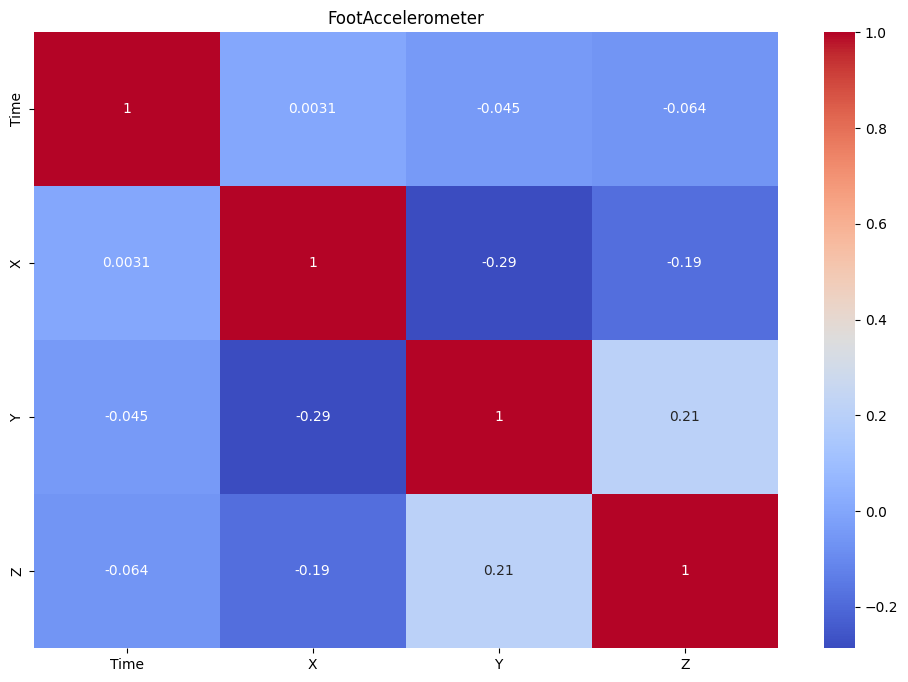

In [130]:
# Робота з даними для ходьби (акселерометр)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(dfFootAccelerometer, test_size=0.30, random_state=42)

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Кореляційна матриця
correlation_matrix = dfFootAccelerometer.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("FootAccelerometer")
plt.show()

Точність SVM моделі:  0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.94      0.94      0.94        16

    accuracy                           0.92        25
   macro avg       0.91      0.91      0.91        25
weighted avg       0.92      0.92      0.92        25



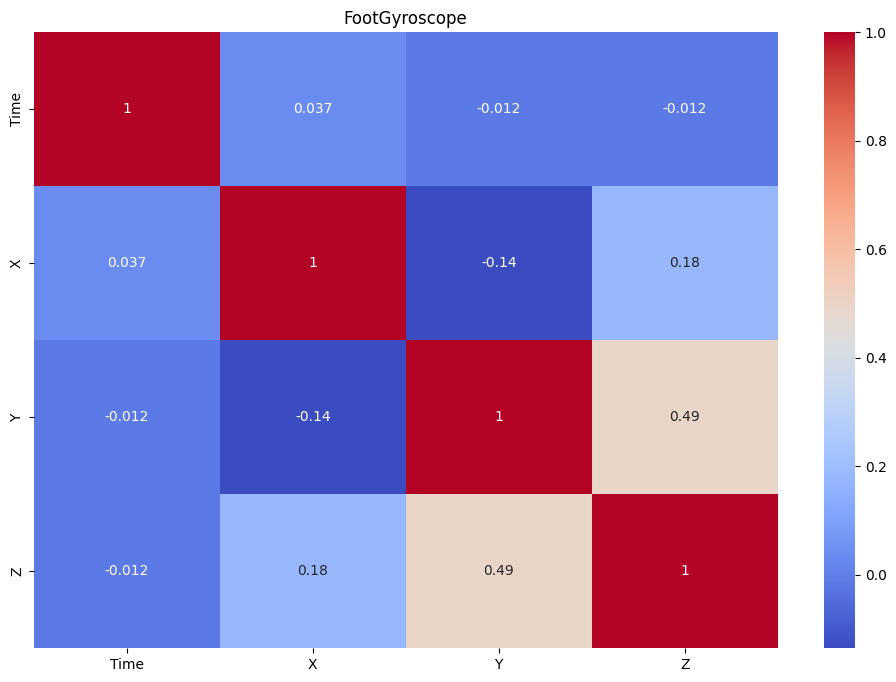

In [131]:
# Робота з даними для ходьби (гіроскоп)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(dfFootGyroscope, test_size=0.30, random_state=42)

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Кореляційна матриця
correlation_matrix = dfFootGyroscope.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("FootGyroscope")
plt.show()


Точність SVM моделі:  0.92
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



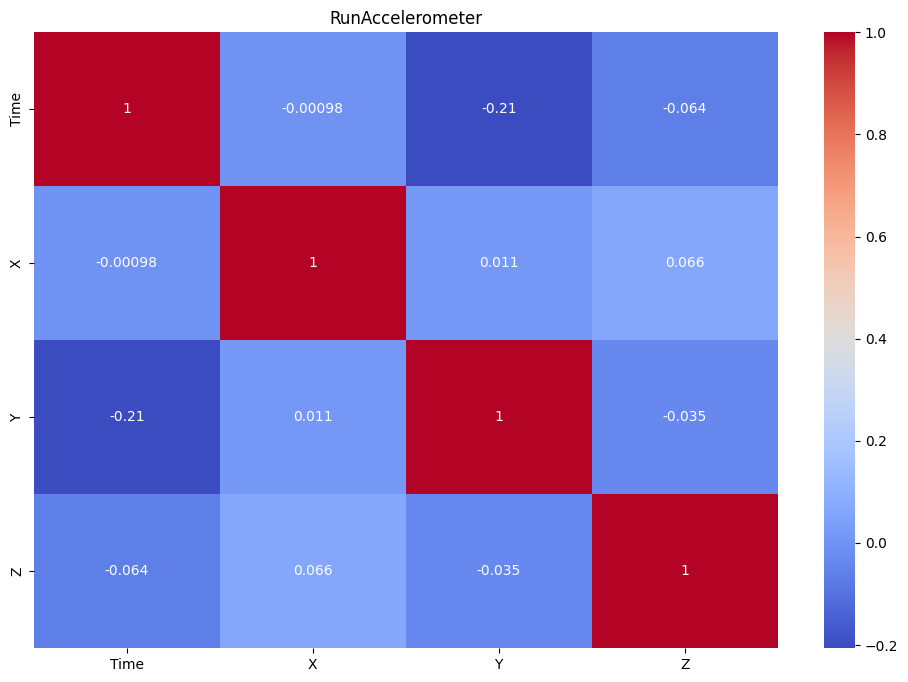

In [132]:
# Робота з даними для біг (акселерометр)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(dfRunAccelerometer, test_size=0.30, random_state=42)

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Кореляційна матриця
correlation_matrix = dfRunAccelerometer.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("RunAccelerometer")
plt.show()

Точність SVM моделі:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



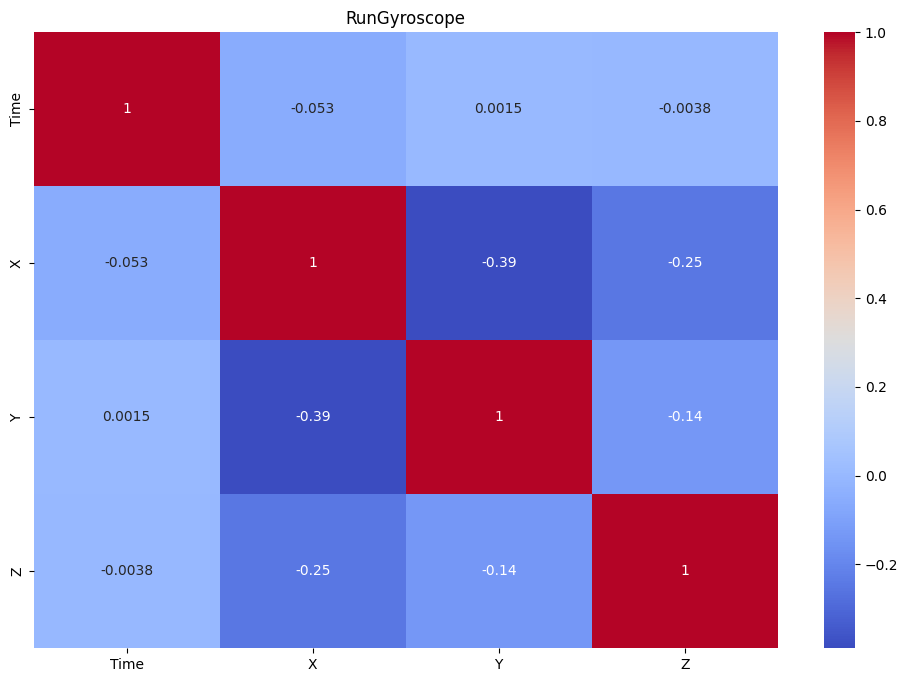

In [133]:
# Робота з даними для ходьби (гіроскоп)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(dfRunGyroscope, test_size=0.30, random_state=42)

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Кореляційна матриця
correlation_matrix = dfRunGyroscope.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("RunGyroscope")
plt.show()


Точність SVM моделі:  0.84
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.75      1.00      0.86        12

    accuracy                           0.84        25
   macro avg       0.88      0.85      0.84        25
weighted avg       0.88      0.84      0.84        25



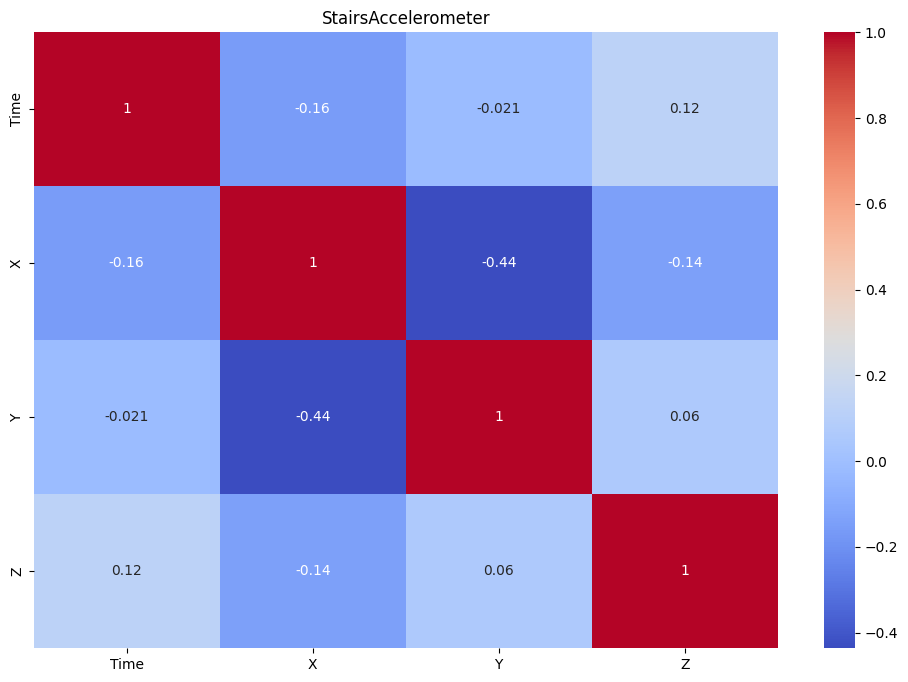

In [134]:
# Робота з даними для сходи (акселерометр)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(dfStairsAccelerometer, test_size=0.30, random_state=42)

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Кореляційна матриця
correlation_matrix = dfStairsAccelerometer.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("StairsAccelerometer")
plt.show()

Точність SVM моделі:  0.96
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



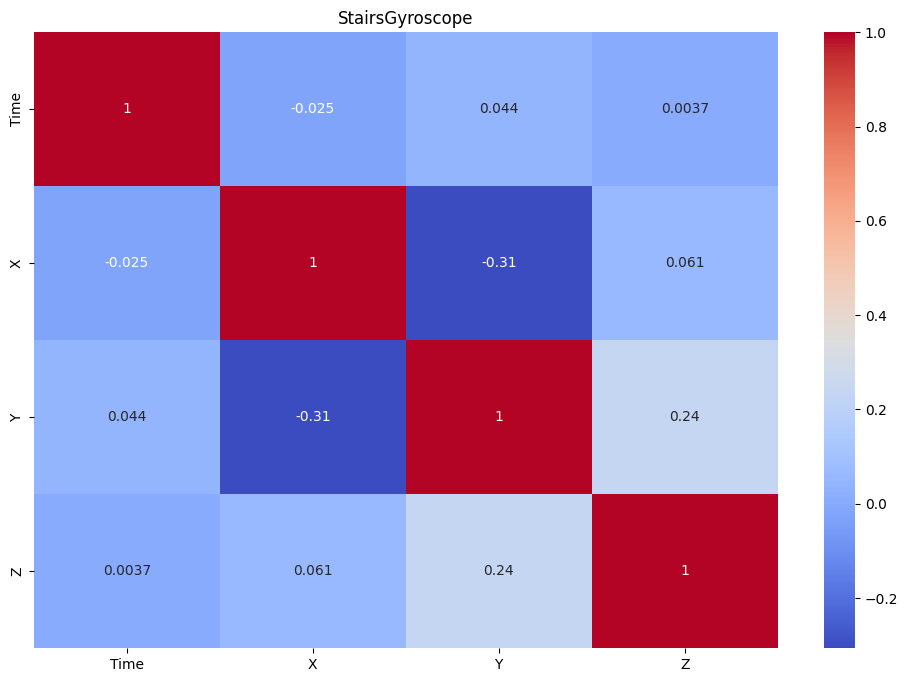

In [135]:
# Робота з даними для сходи (гіроскоп)

# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(dfStairsGyroscope, test_size=0.30, random_state=42)

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("Точність SVM моделі: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Кореляційна матриця
correlation_matrix = dfStairsGyroscope.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("StairsGyroscope")
plt.show()